In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
ds = pd.read_csv('archive (1)/all_season_summary.csv')

In [3]:
ds.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,...,"Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,...,"KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,...,"Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Dinesh ...","Rohit Sharma (UKN),Ishan Kishan (WK),Cameron G...","Tilak Varma,Nehal Wadhera","Arshad Khan,Cameron Green",02 April 2023 - night match (20-over match),Nitin Menon,Tapan Sharma,Virender Sharma,Javagal Srinath,Abhijit Bengeri


In [4]:
clean_ds = ds.drop(columns=['season','id','name','description','away_team','umpire1', 'umpire2','tv_umpire','referee','reserve_umpire','result','start_date','end_date','highlights','home_key_batsman','home_key_bowler','home_playx1','away_playx1','away_key_batsman','away_key_bowler','match_days','venue_id','points','pom','super_over','home_overs','home_runs','home_wickets','home_boundaries','away_overs','away_runs','away_wickets','away_boundaries'])

In [5]:
clean_ds['venue_name'].unique().shape

(37,)

In [6]:
df = pd.concat([
    clean_ds,
    pd.get_dummies(clean_ds['decision'], prefix='decision'),
    pd.get_dummies(clean_ds['venue_name'], prefix='venue')

], axis=1).drop(columns=[ 'venue_name','decision','2nd_inning_score','1st_inning_score','home_score','away_score'])#


In [7]:
df['short_name'].iloc[0].split()[0]

'GT'

In [8]:
df['team1'] = df['short_name'].apply(lambda s : s.split()[0])
df['team2'] = df['short_name'].apply(lambda s : s.split()[2])
df.drop(columns = ['short_name'], inplace=True)

In [9]:
df.fillna("N.A")

,home_team,toss_won,winner,home_captain,away_captain,decision_BAT FIRST,decision_BOWL FIRST,decision_no toss,"venue_Arun Jaitley Stadium, Delhi","venue_Barabati Stadium, Cuttack",...,"venue_Shaheed Veer Narayan Singh International Stadium, Raipur",venue_Sharjah Cricket Stadium,"venue_Sheikh Zayed Stadium, Abu Dhabi","venue_St George's Park, Port Elizabeth","venue_SuperSport Park, Centurion","venue_The Wanderers Stadium, Johannesburg","venue_Vidarbha Cricket Association Stadium, Jamtha, Nagpur","venue_Wankhede Stadium, Mumbai",team1,team2
0,GT,GT,GT,Hardik Pandya,MS Dhoni,False,True,False,False,False,...,False,False,False,False,False,False,False,False,GT,CSK
1,PBKS,KKR,PBKS,Shikhar Dhawan,Nitish Rana,False,True,False,False,False,...,False,False,False,False,False,False,False,False,PBKS,KKR
2,LSG,DC,LSG,KL Rahul,David Warner,False,True,False,False,False,...,False,False,False,False,False,False,False,False,LSG,DC
3,SRH,SRH,RR,Bhuvneshwar Kumar,Sanju Samson,False,True,False,False,False,...,False,False,False,False,False,False,False,False,SRH,RR
4,RCB,RCB,RCB,Faf du Plessis,Rohit Sharma,False,True,False,False,False,...,False,False,False,False,False,False,False,False,RCB,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,RCB,MI,MI,Rahul Dravid,Sachin Tendulkar,False,True,False,False,False,...,False,False,False,False,False,False,False,False,RCB,MI
1028,KXIP,RR,KXIP,Yuvraj Singh,Shane Watson,False,True,False,False,False,...,False,False,False,False,False,False,False,False,KXIP,RR
1029,DC,DC,RR,Virender Sehwag,Shane Warne,False,True,False,False,False,...,False,False,False,False,False,False,False,True,DC,RR
1030,CSK,KXIP,CSK,MS Dhoni,Yuvraj Singh,True,False,False,False,False,...,False,False,False,False,False,False,False,True,CSK,KXIP


In [10]:
le = LabelEncoder()
df['team1'] = le.fit_transform(df['team1'])
df['team2'] = le.fit_transform(df['team2'])
df['home_team'] = le.fit_transform(df['home_team'])
df['toss_won'] = le.fit_transform(df['toss_won'])
df['winner'] = le.fit_transform(df['winner'])


In [11]:
df['home_captain'] = le.fit_transform(df['home_captain'])
df['away_captain'] = le.fit_transform(df['away_captain'])

In [43]:
win = []
for _ , data in df.iterrows():
    if data['home_team'] == data['winner']:
        win.append(True)
    else:
        win.append(False)


In [47]:
df['home_team_winner'] = win

In [28]:
df.groupby('home_captain')['winner']

<Axes: >

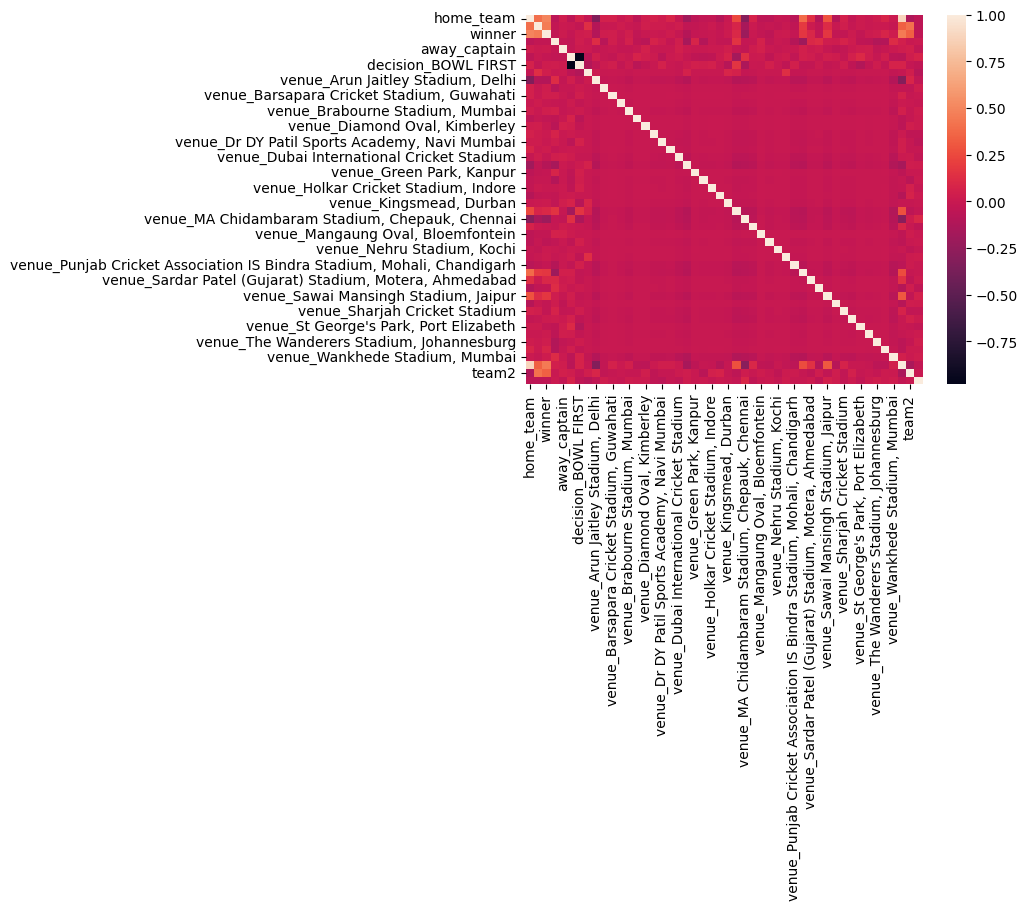

In [45]:
sns.heatmap(data = df.corr())

In [48]:
X = df.drop(columns = ['winner','home_team_winner'])
y = df['home_team_winner']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [64]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
importances = rf.feature_importances_

In [65]:
y_pred = rf.predict(x_test)


In [56]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test, y_pred)

0.5845410628019324

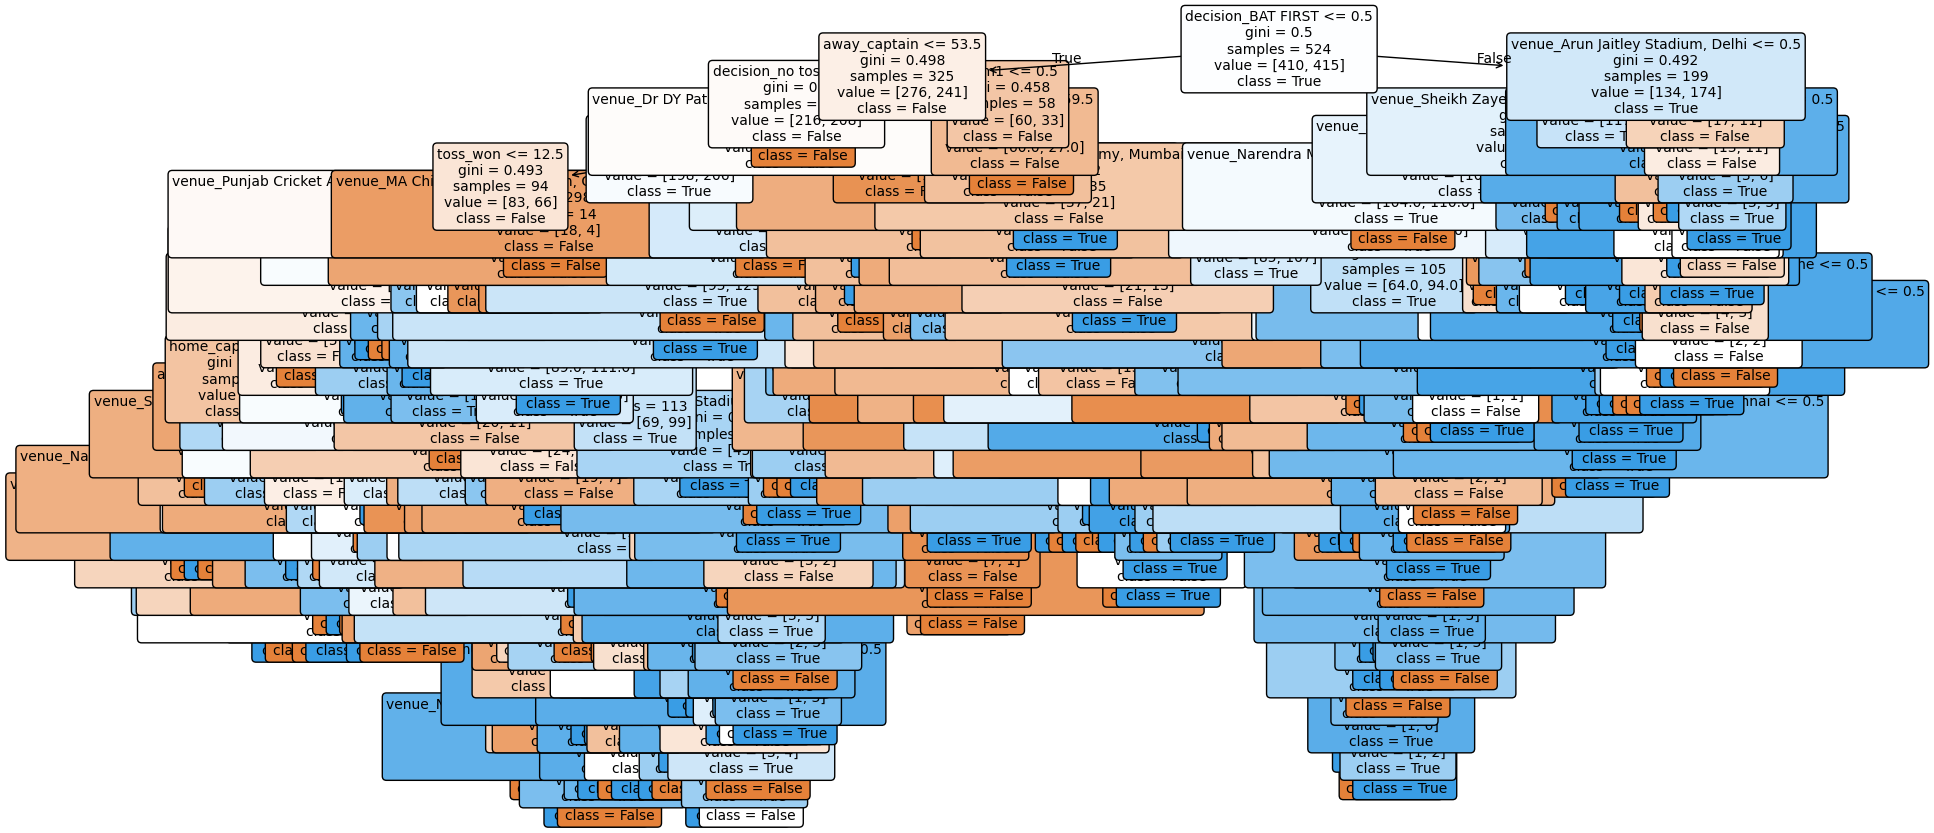

In [73]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Pick one tree from the forest (e.g., the first one)
estimator = rf.estimators_[0]

plt.figure(figsize=(20, 10))  # make it large enough to read
plot_tree(estimator,
          feature_names=x_train.columns,  # or just range of feature indices if not a DataFrame
          class_names=[str(cls) for cls in rf.classes_],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()